In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import label2one_hot
from generate_data import generate_data, generate_grid_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossCrossEntropy, LossMSE
from optimizers import SGD

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_all, y_all, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4], activation='softmax'))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    sgd.train(model, x_all, y_all, num_of_epochs, val_split=0.2)

    return model

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([ 0.,  1.], dtype=float32)

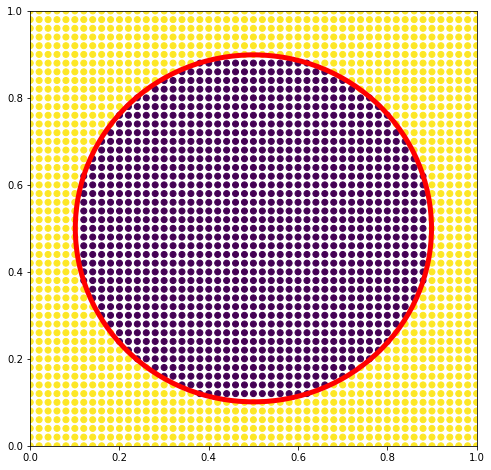

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

### Test with Categorical Crossentropy

In [6]:
x_all, y_all = generate_data(num_of_points=500)
y_all = label2one_hot(y_all, val=0)  # convert labels to 1-hot encoding

print("x_all.shape: {} -- y_all.shape: {}".format(x_all.shape, y_all.shape))

x_all.shape: torch.Size([500, 2]) -- y_all.shape: torch.Size([500, 2])


In [7]:
model = default_net_1(x_all, y_all, num_of_epochs=2000)
loss1 = model.loss.loss_logging

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 
epoch: 0 ---> train_loss: 0.6920, train_acc: 0.52 ----- val_loss: 0.6963, val_acc: 0.45
epoch: 100 ---> train_loss: 0.6877, train_acc: 0.545 ----- val_loss: 0.6968, val_acc: 0.49
epoch: 200 ---> train_loss: 0.6876, train_acc: 0.545 ----- val_loss: 0.6957, val_acc: 0.49
epoch: 300 ---> train_loss: 0.6881, train_acc: 0.545 ----- val_loss: 0.6953, val_acc: 0.49
epoch: 400 ---> train_loss: 0.6842, train_acc: 0.545 ----- val_loss: 0.6945, val_acc: 0.49
epoch: 500 ---> train_loss: 0.6824, train_acc: 0.545 ----- val_loss: 0.6920, val_acc: 0.49
epoch: 600 ---> train_loss: 0.6731, train_acc: 0.545 ----- val_loss: 0.6850, val_acc: 0.49
epoch: 700 ---> train_loss: 0.6456, train_acc: 0.67 ----- val_loss: 0.6616, val_acc: 0.61
epoch: 800 ---> tra

In [10]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)
test_acc, test_loss

(0.960399846212995, 0.10694761574268341)

torch.Size([2601, 2])  --  torch.Size([2601])
points: <class 'numpy.ndarray'> -- points: (2601, 2)


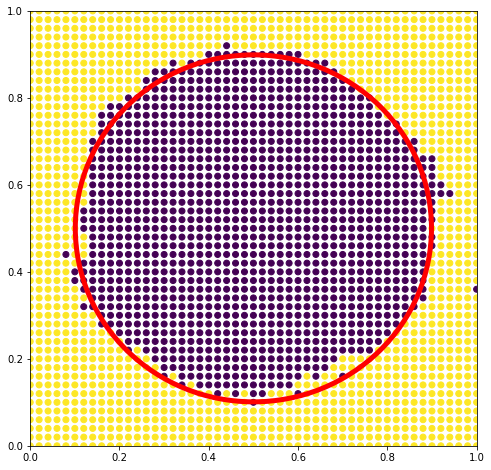

In [11]:
print(x_test.shape, " -- ", y_pred.shape)
plot_data(x_test, y_pred)

### Test with Mean Square Error

In [12]:
def mse_net_1(x_all, y_all, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):

    mse = LossMSE()
    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[3], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4]))
    model.loss = mse

    sgd = SGD(lr, momentum_coef, weight_decay=0)
    sgd.train(model, x_all, y_all, num_of_epochs, val_split=0.2, verbose=1)

    return model

In [13]:
x_all, y_all = generate_data(num_of_points=500)
print(x_all.shape, " -- ", y_all.shape)
y_all = label2one_hot(y_all, val=-1)  # convert labels to 1-hot encoding

model = mse_net_1(x_all, y_all, num_of_epochs=2000)

torch.Size([500, 2])  --  torch.Size([500])
Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
epoch: 0 ---> train_loss: 2.0185, train_acc: 0.5325 ----- val_loss: 2.0712, val_acc: 0.47
epoch: 100 ---> train_loss: 1.9774, train_acc: 0.5325 ----- val_loss: 2.0109, val_acc: 0.47
epoch: 200 ---> train_loss: 1.8235, train_acc: 0.7 ----- val_loss: 1.8602, val_acc: 0.73
epoch: 300 ---> train_loss: 1.4225, train_acc: 0.71 ----- val_loss: 1.3510, val_acc: 0.73
epoch: 400 ---> train_loss: 0.8727, train_acc: 0.85 ----- val_loss: 1.1058, val_acc: 0.77
epoch: 500 ---> train_loss: 0.5430, train_acc: 0.9175 ----- val_loss: 0.5607, val_acc: 0.93
epoch: 600 ---> train_loss: 0.5908, train_acc: 0.9225 ----- val_loss: 0.6556, val_acc: 0.93
epoch: 700 ---> train_loss: 0.5340, train_acc: 0.9175 ----- val_loss: 0.5382, val_acc: 0.93
ep

In [14]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=-1), return_pred=True)
test_acc, test_loss

(0.9423298731257209, 0.3787287771701813)

points: <class 'numpy.ndarray'> -- points: (2601, 2)


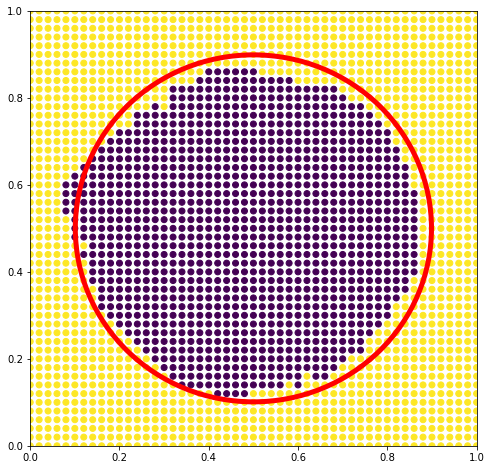

In [15]:
plot_data(x_test, y_pred)